## Ejercicio 2

Implementar 3 algoritmos para segmentación binaria de imágenes. De estos, uno debe ser un algoritmo local.
Aplicar cada uno de estos algoritmos a al menos 3 imágenes en escala de grises diferentes y comparar los resultados obtenidos
de cada segmentador. (Mostrar visualmente la imagen original y las binarizaciones).
Concluya cuál de sus algoritmos obtiene mejores resultados.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

In [31]:
def aplicar_segmentacion(imagen_path):
    img = io.imread(imagen_path)
    img_gray = color.rgb2gray(img) if len(img.shape) == 3 else img

    # 1. Segmentación con Niblack
    umbral_fijo = filters.threshold_niblack(img_gray, window_size=51, k=-0.1) 
    bin_fijo = img_gray > umbral_fijo

    # 2. Segmentación con Otsu
    umbral_otsu = filters.threshold_otsu(img_gray)
    bin_otsu = img_gray > umbral_otsu

    # 3. Segmentación local (umbral adaptativo)
    bin_adapt = img_gray > filters.threshold_local(img_gray, block_size=255)

    titulos = ['Original', 'Niblack', f'Otsu (T={umbral_otsu:.2f})', 'Local (Adaptativo)']
    imagenes = [img_gray, bin_fijo, bin_otsu, bin_adapt]

    plt.figure(figsize=(12, 8))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(imagenes[i], cmap='gray')
        plt.title(titulos[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Procesando paisaje.jpg


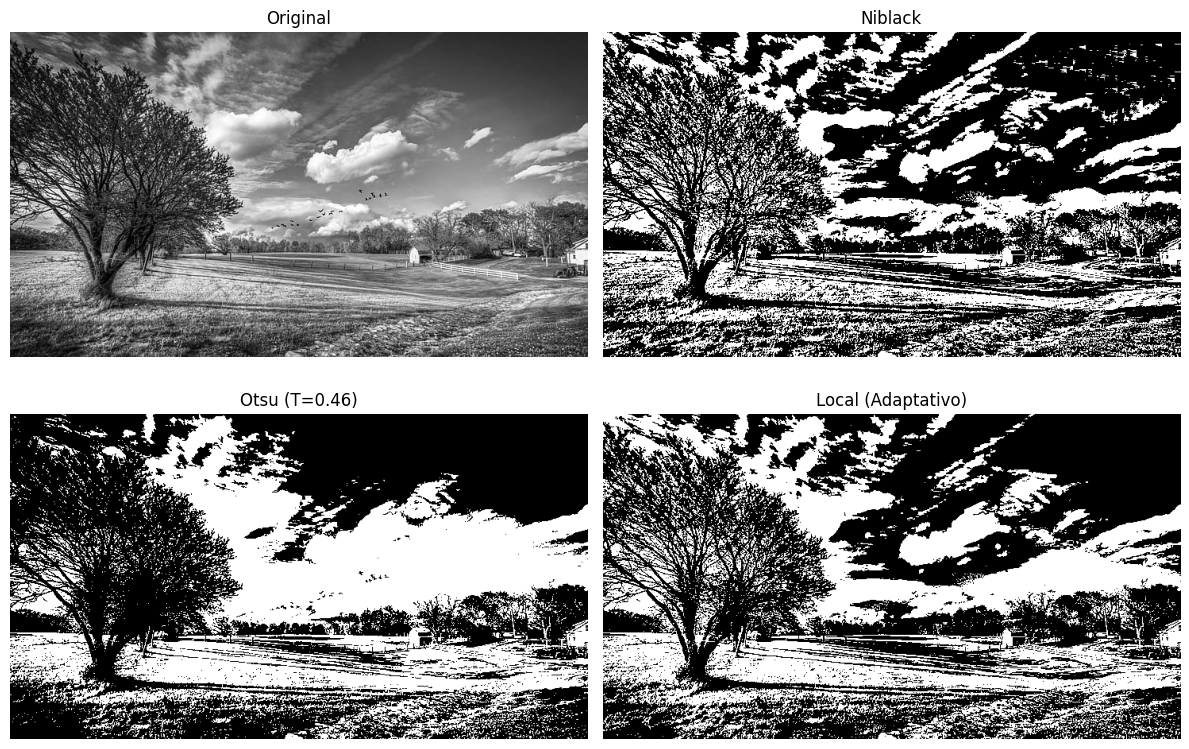

Procesando paisaje2.jpg


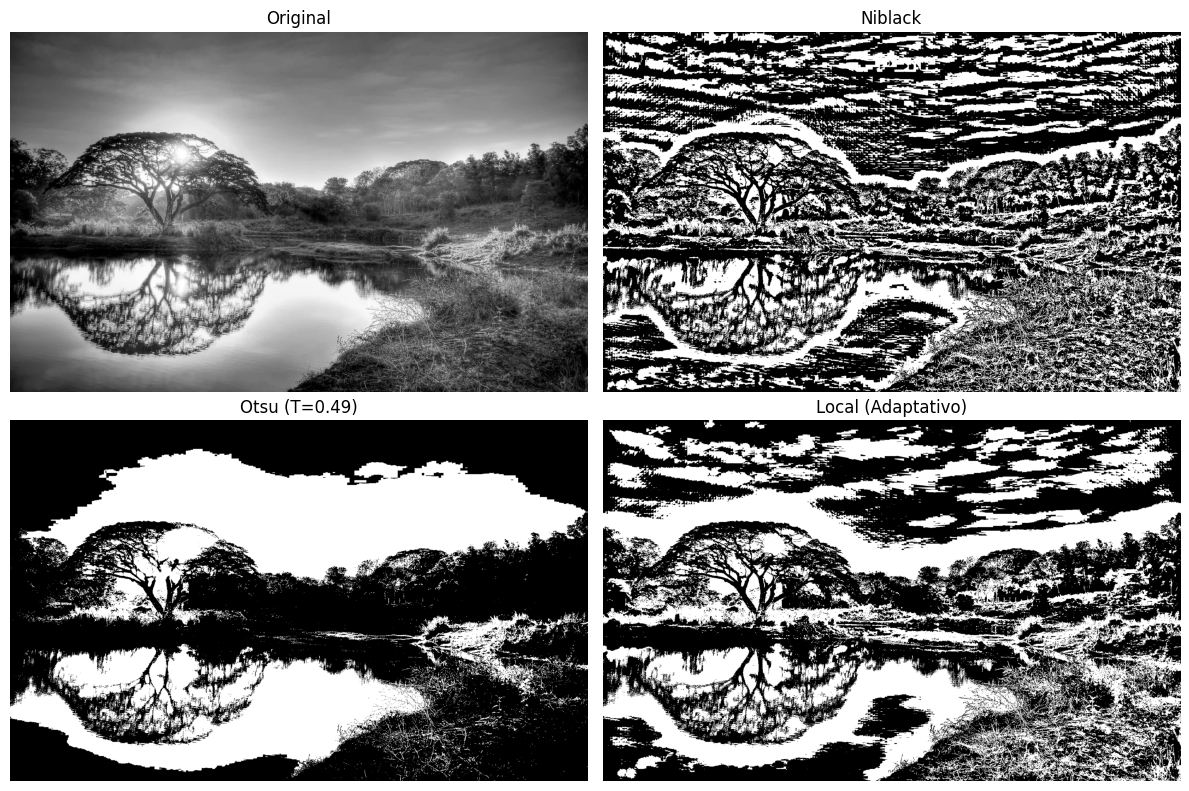

Procesando imagen3.jpeg


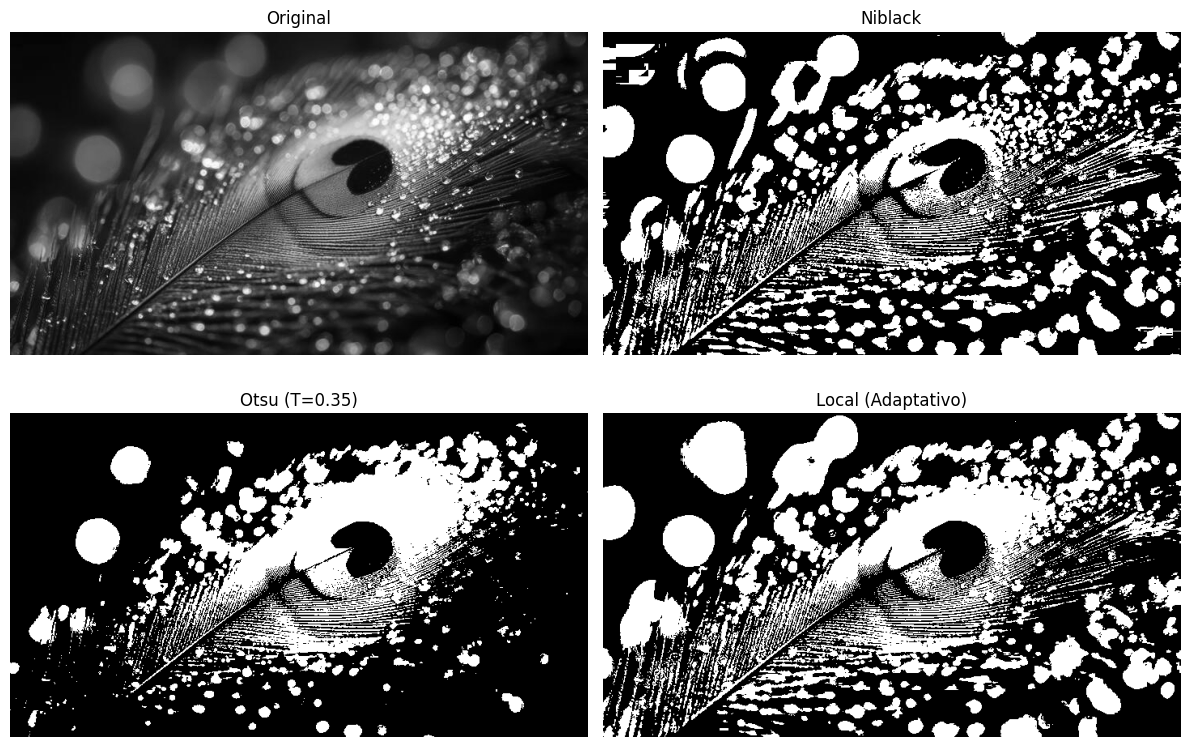

In [32]:
imagenes = ['paisaje.jpg', 'paisaje2.jpg', 'imagen3.jpeg']

# Aplicar segmentación a cada imagen
for ruta in imagenes:
    try:
        print(f"Procesando {ruta}")
        aplicar_segmentacion(ruta)
    except FileNotFoundError:
        print(f"La imagen {ruta} no fue encontrada.")